In [1]:
import serial
import time
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [2]:
ser = serial.Serial()

In [3]:
ser.baudrate = 38400 
ser.port = 'COM3' 
ser.parity=serial.PARITY_EVEN
ser.timeout=2
print ser.name
print ser
ser.open()
ser.is_open

COM3
Serial<id=0x38eae30, open=False>(port='COM3', baudrate=38400, bytesize=8, parity='E', stopbits=1, timeout=2, xonxoff=False, rtscts=False, dsrdtr=False)


True

In [5]:
from C1120402 import *

In [6]:
def send_command(Command, param = None) : 
    """send the Command (string) to the module, and return the answer.
    See upper for examples of the commands"""
    #get the checksum and the command line
    STX = 0x02
    ETX = 0x03
    CR = 0x0D
    Check_sum = check_sum(Command, param)
    if param : 
        command_line = chr(STX)+Command+str(param)+chr(ETX)+str(Check_sum)+'\r'
    else :
        command_line = chr(STX)+Command+chr(ETX)+str(Check_sum)+'\r'        
    command_line=command_line.upper()
    print `command_line`
    #Send the command_line to the module
    ser.write(command_line)
    ser.flush()
    out = ''
    # let's wait one second before reading output (let's give device time to answer)
    if Command != 'HRE':
        time.sleep(0.5)
    else :
        time.sleep(15)
    while ser.inWaiting() > 0:
        out += ser.read(1)
    if check_the_sum(out) :
        return out
    else :
        print "Check SUM error ! WARNING !"
        return out

In [7]:
#Liste des commandes possible : 

param = None
# Temperature correction factor setting
#Command = "HST"
#vocal_temperature_correction()

# Temperature correction factor read
#Command = "HRT"

# Get the monitor information and status
Command = "HPO"

# Get status,
#Command = "HGS"

# Get output voltage
#Command = "HGV"

# Get output current
#Command = "HGC"

# Get MPPC temperature
#Command = "HGT"

# Get firmware information
#Command = "HFI"

# Get serial number
#Command = "HGN"

# High voltage output OFF
#Command = "HOF"

# High voltage output ON
#Command = "HON"

# Power Supply reset
#Command = "HRE"

# Switching the temperature compensation mode
#Command = "HCM"
#param = '0'
#param = '1'
# + un parametre : mode (0 ou 1) : O = Disable, 1 = Enable

# Power supply function setting
#Command = "HSC"
#param = HSC_param(1,1)
# + un paramètre à ajouter : 4 caracteres en hexadecimal

# Power Supply function read
#Command = "HRC"

# Reference voltage temporary setting
#Command = "HBV"
# + un paramètre à ajouter : 4 caracteres en hexadecimal

In [31]:
#vocal_temperature_correction()
param = HST_param(DTp1 = 0., DTp2 = 0., DT1 = 0., DT2 = 0., V_b = 1., T_b = 25.)
Command = "HST"
out = send_command(Command, param)
print `out`
print translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out)




'\x02HST00000000000000000227B7D7\x03B3\r'
'\x02hst\x0354\r'
hst


In [33]:
param = None
# Temperature correction factor read
Command = "HRT"
out = send_command(Command, param)
print `out`    
#vocal_temperature_correction()
translate_command_HRT(out)

'\x02HRT\x03F3\r'
'\x02hrt00000000000000000227B7D7\x0312\r'
DT'1 : 0.0 mV/�C�
DT'2 : 0.0 mV/�C�
DT1 : 0.0 mV/�C
DT2 : 0.0 mV/�C
V_b : 0.998412 V
T_b : 25.0015618182 �C


In [61]:
param = None
# Power Supply reset
Command = "HRE"
out = send_command(Command, param)
print `out`
print translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out)


'\x02HRE\x03E4\r'
'\x02hre\x0344\r'
hre


In [16]:
param = None

# Get output voltage
Command = "HGV"
out = send_command(Command, param)
print `out`
translate_command_HGV(out, vocal = False)

# High voltage output OFF
Command = "HOF"
out = send_command(Command, param)
print `out`
print translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out)

# Get the monitor information and status
Command = "HPO"
out = send_command(Command, param)
print `out`
translate_command_HPO(out, vocal = False)



'\x02HGV\x03EA\r'
'\x02hgv0395\x031B\r'
Voltage : 1.661604 V
'\x02HOF\x03E2\r'
'\x02hof\x0342\r'
hof
'\x02HPO\x03EC\r'
'\x02hpo0012000003990000022B\x033A\r'

10010
High voltage output : OFF
Overcurrent protection : Working protection
Output current value : within specification, value is more than 2mA
Temperature sensor connect : Temperature sensor is unconnected or operating temperature departs from -30 to 100 degree.
Operating temperature limit : Operating temperature depart from -20 to 60 degree

WARNING DOCUMENTATION : Temperature correction : Enable



Automatic restoration : not working
Voltage suppression : not working
Output voltage control : Not working

Voltage stability : unstable

Voltage : 1.668852 V
Current : 0.0 mA
Temperature : 186.257481818 �C


In [60]:
# Get the monitor information and status
Command = "HPO"
out = send_command(Command, param)
print `out`
translate_command_HPO(out, vocal = False)


'\x02HPO\x03EC\r'
Attention, fail in check the sum :
out : '\xc0\x02hpo0012000003AE004E02A7\x036B\r'
sum_given : 6B
sum_calc : 0x6a1
sum_compared : A1
Check SUM error ! WARNING !
'\xc0\x02hpo0012000003AE004E02A7\x036B\r'



ValueError: invalid literal for int() with base 16: 'o001'

'\x02HGV\x03EA\r'
'\x02hgv0393\x0319\r'
Voltage : 1.65798 V
'\x02HRT\x03F3\r'
'\x02hrt00000000000000000227B7D7\x0312\r'
This function performs temperature compensation 
 of the output voltage using the temperature T[�C] of the external 
 temperature sensor.
 The output voltage Vo[V] is determined by the following formula. 
 Vo = (DT� * (T � Tb)^2 + DT * (T � Tb)) / 1000 + Vb
 Where DT[mV/�C] is temperature coefficient, T[�C] is temperature of 
 the external temperature sensor. Temperature coefficient DT[mV/�C] 
 
can set to four parameters of high temperature side coefficient  
 DT�1[mV/�C2], DT1[mV/�C] and primary low temperature side coefficient 
 DT�2[mV/�C2], DT2[mV/�C] (See Fig. 3). If you don�t use this function, 
 please input 0 into DT�1 and DT.

When the temperature of the temperature sensor deviates 
 significantly, the temperature compensation function becomes 
 OFF forcibly. In this case, the output voltage will be set 
 to the reference voltage Vb[V].


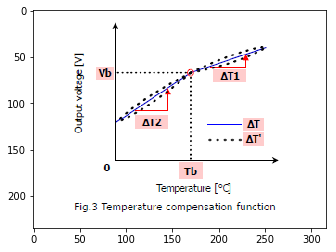

DT'1 : 0.0 mV/�C�
DT'2 : 0.0 mV/�C�
DT1 : 0.0 mV/�C
DT2 : 0.0 mV/�C
V_b : 0.998412 V
T_b : 25.0015618182 �C


In [52]:
param = None

# Get output voltage
Command = "HGV"
out = send_command(Command, param)
print `out`
translate_command_HGV(out, vocal = False)

# Temperature correction factor read
Command = "HRT"
out = send_command(Command, param)
print `out`    
vocal_temperature_correction()
translate_command_HRT(out)



In [63]:
# High voltage output ON
Command = "HON"
out = send_command(Command, param)
print `out`
print translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out)


# Get output voltage
Command = "HGV"
out = send_command(Command, param)
print `out`
translate_command_HGV(out, vocal = False)

'\x02HON\x03EA\r'
'\x02hon\x034A\r'
hon
'\x02HGV\x03EA\r'
'\x02hgv03A6\x0324\r'
Voltage : 1.692408 V


1.6924080000000001

In [64]:
# Get output voltage
Command = "HGV"
out = send_command(Command, param)
print `out`
translate_command_HGV(out, vocal = False)

'\x02HGV\x03EA\r'
'\x02hgv03B5\x0324\r'
Voltage : 1.719588 V


1.7195880000000001

In [57]:
# High voltage output OFF
Command = "HOF"
out = send_command(Command, param)
print `out`
print translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out)


# Get output voltage
Command = "HGV"
out = send_command(Command, param)
print `out`
translate_command_HGV(out, vocal = False)

'\x02HOF\x03E2\r'
'\x02hof\x0342\r'
hof
'\x02HGV\x03EA\r'
'\x02hgv03B2\x0321\r'
Voltage : 1.714152 V


1.7141520000000001

In [9]:
out = send_command(Command, param)
print `out`
    
#vocal_temperature_correction()
#translate_command_HRT(out)

translate_command_HPO(out, vocal = False)
#translate_command_HFI(out)
#translate_command_HGN(out)
#translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out)
#translate_command_HRC (out)


'\x02HPO\x03EC\r'
0x556L
56
'\x02hpo0012000003F400570E36\x0356\r'

10010
High voltage output : OFF
Overcurrent protection : Working protection
Output current value : within specification, value is more than 2mA
Temperature sensor connect : Temperature sensor is unconnected or operating temperature departs from -30 to 100 degree.
Operating temperature limit : Operating temperature depart from -20 to 60 degree

WARNING DOCUMENTATION : Temperature correction : Enable



Automatic restoration : not working
Voltage suppression : not working
Output voltage control : Not working

Voltage stability : unstable

Voltage : 1.833744 V
Current : 0.451878 mA
Temperature : 175.56788 °C


In [8]:
ser.close()


In [4]:
def HSC_param (overcurrent_protection_function, output_voltage_control_function) :
    """take 2 parameters, int 0 or 1, and return the 4 hex digit for the HSC function 
        6-1. Overcurrent protection function
    This is the condition of overcurrent protection function.
    0: Shut down function
    1: Automatic restoration function
        6-2. Output voltage control function
    This is the condition of output voltage control function.
    0: Disable
    1: Enable"""
    if overcurrent_protection_function != 0 and overcurrent_protection_function != 1 :
        return 'value error'
    if output_voltage_control_function != 0 and output_voltage_control_function != 1 :
        return 'value error'
    #was binary. translation in integer:
    y = output_voltage_control_function + 2*overcurrent_protection_function
    return '{0:04X}'.format(y)

def HST_param(DTp1 = 0., DTp2 = 0., DT1 = 0., DT2 = 0., V_b = 40., T_b = 25.) :
    """Take the values of the temperature correction factor, 
    and translate it in hexadecimal to be sent to the power supply
    the units are : 
    DT’1[mV/°C2], DT’2[mV/°C2], DT1[mV/°C], DT2[mV/°C], V_b[V], T_b[°C]
    For more information about these quantities, vocal_temperature_correction() 
    """
    Dtp1 = int(DTp1/(1.507e-3))
    Dtp2 =  int(DTp2/(1.507e-3))
    Dt1 = int(DT1/(5.225e-2))
    Dt2 = int(DT2/(5.225e-2))
    v_b = int(V_b/(1.812e-3))
    t_b = int((T_b*-5.5e-3+1.035)/(1.907e-5))
    return "{0:04X}{1:04X}{2:04X}{3:04X}{4:04X}{5:04X}".format(Dtp1,Dtp2,Dt1,Dt2,v_b,t_b)

In [5]:
#The level1 command : take the digits (not the output, just the digits), and translate in english

def translate_temperature(t_digit):
    """Take the 4 digits string sent by the module,
    and return a float : the temperature, in Celcius"""
    t = int(t_digit, 16)
    T = (t*1.907e-5 - 1.035)/(-5.5e-3)
    return T

def test_translate_temperature():
    """For one input value, test if the output of the
    translate temperature is still the same"""
    T = translate_temperature('B701')
    if T < 25.743 or T > 25.744 :
        return 'FAIL FAIL FAIL IN TEMPERATURE'
    
def translate_output_voltage (v_digit):
    """Take the 4 digits string sent by the module,
    and return a float : the output voltage, in Volt"""
    v = int (v_digit, 16)
    V = v*1.812e-3
    return V

def test_translate_output_voltage():
    """For one input value, test if the output of the 
    output_voltage is still the same"""
    V = translate_output_voltage('9B38')
    if V < 72.001 or V>72.002:
        return 'FAIL FAIL FAIL IN OUTPUT_VOLTAGE'

def translate_output_current (i_digit):
    """Take the 4 digits string sent by the module,
    and return a float : the output current, in mA"""
    i = int (i_digit, 16)
    I = i*5.194e-3
    return I

def test_translate_output_current():
    """For ine input value, test if the output of the 
    output_current is still the same"""
    I = translate_output_current('0014')
    if I < 0.103 or I>0.104:
        return 'FAIL FAIL FAIL IN OUTPUT_CURRENT'    

def translation_Dt_prime (Dtp_digit) :
    """Take the 4 digits string sent by the module,
    and return a float : the coef DT', in mV/°C²"""
    Dtp = int(Dtp_digit, 16)
    DTp = Dtp*1.507e-3
    return DTp

def translation_Dt(Dt_digit):
    """Take the 4 digits string sent by the module,
    and return a float : the coef DT, in mV/°C"""
    Dt = int(Dt_digit, 16)
    DT = Dt*5.225e-2
    return DT
    
#Dictionary about status

status = {1:('High voltage output : OFF', 'High voltage output : ON'),
          2:('Overcurrent protection : Not working','Overcurrent protection : Working protection'),
          3:('Output current value : within specification, value is more than 2mA','Output current value : Outside specification, value is less than 2mA'),
          4:('Temperature sensor connect : Temperature sensor is unconnected or operating temperature departs from -30 to 100 degree.'
,'Temperature sensor connect : Temperature sensor is connected and operating temperature is  -30 to 100 degree'
),
          5:('Operating temperature limit : Operating temperature is -20 to 60 degree','Operating temperature limit : Operating temperature depart from -20 to 60 degree'),
          6:('',''),
          7:('WARNING DOCUMENTATION : Temperature correction : Enable','WARNING DOCUMENTATION : Temperature correction : Disable'),
          8:('',''),
          9:('',''),
          10:('',''),
          11:('Automatic restoration : not working','Automatic restoration : working'),
          12:('Voltage suppression : not working','Voltage suppression : not working. When over current protection is running'),
          13:('Output voltage control : Not working','Output voltage control : During voltage control'),
          14:('',''),
          15:('Voltage stability : unstable','Voltage stability : stable'),
          16:('',''),
         }

status_vocal = {1:"When not using the output voltage ON/OFF control function, high voltage is output immediately after the power is turned on.",
                2:"The threshold of the default is 3mA. When current load of 3mA exceeded more than 4 seconds, the output voltage becomes 0V. When you want to output the high voltage again, please send a reset command or reboot the C11204-02."
,
                3:"",
                4:"WARNING DOCUMENTATION : Opposite at an other part of the documentation. If temperature departs from the operating temperature limit greatly, the temperature compensation becomes OFF forcibly."
,
                5:"If temperature departs from the operating temperature limit greatly, the temperature compensation becomes OFF forcibly."
,
                6:"",
                7:'WARNING DOCUMENTATION : In the case of 0, output voltage is determined by each setting parameter and value of the temperature sensor. In the case of 1, it is decided only by a reference voltage. If you want to switch the mode, please refer to the "4.13 Switching the temperature compensation mode " in this document.',
                8:"",
                9:"",
                10:"",
                11:"",
                12:"In the case of 1, over current protection is set automatic restoration. And when over current protection is running and voltage gradually rises.",
                13:"",
                14:"",
                15:"",
                16:"",
               }    
    
def translate_status(s_digit, vocal = False):
    """print the different informations in the status
    Put vocal = True to have more information about each"""
    s_int = int(s_digit, 16)
    s_bin = bin(s_int)[2:]
    print s_bin
    #First, add '0's until the len of s_bin is 16
    while len(s_bin) < 16 : 
        s_bin = '0'+s_bin
    #I will look at each information one by one
    for i in range(1, 16):
        if vocal : 
            print status_vocal[i]
        print status[i][int(s_bin[-i])] 
        

def check_the_sum(out) :
    """Check is the sum is good. Return boolean"""
    sum_given = out[-3:-1]
    numbers = `out[:-3]`[5:-5]
    sum_calc = hex(sum([ord(x) for x in numbers])+int(0x02)+int(0x03))
    if (str(sum_calc[-3:-1])).upper() == str(sum_given) :
        return True
    else : 
        print "Attention, fail in checksum :"
        print "out : " +`out`
        print "sum_given : "+ sum_given
        print "sum_calc : "+str(sum_calc)
        print "sum_compared : "+(str(sum_calc[-3:-1])).upper()
        return False
    
def check_sum(Command, param = None):
    """Calculate the check sum"""
    STX = 0x02
    ETX = 0x03
    if param : 
        Check_sum = hex(int(STX)+sum([ord(x) for x in Command])+
                        sum([ord(x) for x in param])+int(ETX))
    else : 
        Check_sum = hex(int(STX)+sum([ord(x) for x in Command])+int(ETX))
    CR = 0x0D
    return Check_sum[-3:-1]
        
    
test_translate_temperature()
test_translate_output_voltage()
test_translate_output_current()

#translate_status('4049', vocal = True)

def test_check_sum():
    if check_sum('HPO') != 'ec' :
        print check_sum('HPO')
        print 'FAIL FAIL FAIL IN CHECK SUM'
    if not check_the_sum('\x02hxx0004\x0321\r') :
        print 'FAIL FAIL FAIL IN CHECK THE SUM'
        
test_check_sum()

In [14]:
#the level2 functions : take the output, and return translation in english, using level1 function

def send_command(Command, param = None) : 
    """send the Command (string) to the module, and return the answer.
    See upper for examples of the commands"""
    #get the checksum and the command line
    STX = 0x02
    ETX = 0x03
    CR = 0x0D
    Check_sum = check_sum(Command, param)
    if param : 
        command_line = chr(STX)+Command+str(param)+chr(ETX)+str(Check_sum)+'\r'
    else :
        command_line = chr(STX)+Command+chr(ETX)+str(Check_sum)+'\r'        
    command_line=command_line.upper()
    print `command_line`
    #Send the command_line to the module
    ser.write(command_line)
    ser.flush()
    out = ''
    # let's wait one second before reading output (let's give device time to answer)
    if Command != 'HRE':
        time.sleep(0.5)
    else :
        time.sleep(15)
    while ser.inWaiting() > 0:
        out += ser.read(1)
    if check_the_sum(out) :
        return out
    else :
        print "Check SUM error ! WARNING !"
        return out

def translate_command_HRT(output, vocal = False):
    """Take the return of the HRT command, and print every information"""
    if output[1:4] == 'hxx' :
        return translate_command_error_hxx(output, vocal)
    Dtp1 = output[4:8]
    print "DT'1 : "+str(translation_Dt_prime (Dtp1))+" mV/°C²"
    Dtp2 = output[8:12]
    print "DT'2 : "+str(translation_Dt_prime (Dtp2))+" mV/°C²"
    Dt1 = output[12:16]
    print "DT1 : "+str(translation_Dt(Dt1))+" mV/°C"
    Dt2 = output[16:20]
    print "DT2 : "+str(translation_Dt(Dt2))+" mV/°C"  
    v_b = output[20:24]
    print "V_b : "+str(translate_output_voltage (v_b))+" V"
    t_b = output[24:28]
    print "T_b : "+str(translate_temperature(t_b))+" °C"
    if vocal :
        vocal_temperature_correction()
    
def vocal_temperature_correction():
    print "This function performs temperature compensation \n of the output voltage using the temperature T[°C] of the external \n temperature sensor.\n The output voltage Vo[V] is determined by the following formula. \n Vo = (DT’ * (T – Tb)^2 + DT * (T – Tb)) / 1000 + Vb\n Where DT[mV/°C] is temperature coefficient, T[°C] is temperature of \n the external temperature sensor. Temperature coefficient DT[mV/°C] \n "
    print "can set to four parameters of high temperature side coefficient  \n DT’1[mV/°C2], DT1[mV/°C] and primary low temperature side coefficient \n DT’2[mV/°C2], DT2[mV/°C] (See Fig. 3). If you don’t use this function, \n please input 0 into DT’1 and DT.\n"
    print "When the temperature of the temperature sensor deviates \n significantly, the temperature compensation function becomes \n OFF forcibly. In this case, the output voltage will be set \n to the reference voltage Vb[V]."
    img=mpimg.imread('T_compensation.png')
    imgplot = plt.imshow(img)
    plt.show()

def translate_command_HPO(output, vocal = False) :
    """Take the return of the HPO command, and print every information"""
    if output[1:4] == 'hxx' :
        return translate_command_error_hxx(output, vocal)
    s_digit = output[4:8]
    print ''
    translate_status (s_digit, vocal)
    reserve_digit = output[8:12]
    print ''
    v_digit = output[12:16]
    print 'Voltage : '+str(translate_output_voltage(v_digit))+' V'
    i_digit = output[16:20]
    print 'Current : '+str(translate_output_current(i_digit))+' mA'
    t_digit = output[20:24]
    print 'Temperature : '+str(translate_temperature(t_digit))+' °C'
    

def translate_command_HGV (out, vocal = False) :
    """Take the return of the HGV command, and print the voltage,
    with unity. Return also the voltage"""
    if out[1:4] == 'hxx' :
        return translate_command_error_hxx(out, vocal)
    v_digit = out[4:8]
    print 'Voltage : '+str(translate_output_voltage(v_digit))+' V'
    return translate_output_voltage(v_digit)
    
def translate_command_HGT(out, vocal = False) :
    """Take the return of the HGT command, and print the MPPC 
    temperature, with unity. Return also the temperature"""
    if out[1:4] == 'hxx' :
        return translate_command_error_hxx(out, vocal)
    t_digit = out[4:8]
    print 'Temperature : '+str(translate_temperature(t_digit))+' °C'
    return translate_temperature(t_digit)
    
def translate_command_HGC(out, vocal = False) :
    """Take the return of the HGC command, and print the output current,
    with unity.    Return also the current"""
    if out[1:4] == 'hxx' :
        return translate_command_error_hxx(out, vocal)
    i_digit = out[4:8]
    print 'Current : '+str(translate_output_current(i_digit))+' mA'
    return translate_output_current(i_digit)
    
def translate_command_HFI(out, vocal = False):
    """Take the return of the HFI command, and print every information"""
    if out[1:4] == 'hxx' :
        return translate_command_error_hxx(out, vocal)
    Device_name = out[4:20]
    Version = out[20:36]
    Build_date = out[36:47]
    return Device_name, Version, Build_date

def translate_command_HGN(out, vocal = False):
    """Take the return of the HGN command, and return the serial number"""
    if out[1:4] == 'hxx' :
        return translate_command_error_hxx(out, vocal)
    serial_number = out[4:20]
    return serial_number

def translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out, vocal = False) :
    """translate the command with no information answered"""
    response = out[1:4]
    if response != 'hxx' :
        return response
    else :
        return translate_command_error_hxx(out)


power_supply = {1 : ("Overcurrent protection : Shutdown","Overcurrent protection : Automatic restoration"),
               2 : ("Output voltage control : Disable","Output voltage control : Enable")}
power_supply_vocal = {1 : "This is the condition of overcurrent protection function. \n 0: Shut down function \n 1: Automatic restoration function",
                     2 : "This is the condition of output voltage control function. \n 0: Disable \n 1: Enable"}


def translate_command_HRC (out, vocal = False):
    """Take the return of the HRC command, and 
    return the value of the power supply function"""
    if out[1:4] == 'hxx' :
        return translate_command_error_hxx(out, vocal)
    digit = `out`[8:12]
    s_int = int(digit, 16)
    s_bin = bin(s_int)[2:]
    while len(s_bin)<2:
        s_bin = '0'+s_bin
    #I will look at each information one by one
    for i in range(1, 3):
        if vocal : 
            print power_supply_vocal[i]
        print power_supply[i][int(s_bin[-i])] 
    return None


def translate_command_error_hxx(out, vocal = False):
    """take the output of the module (string), check if it's the error_code, 
    and if yes, return the error description. In vocal, print also the description"""
    response = out[1:4]
    if response != 'hxx' :
        return response
    error_code = int(out[7])
    errors = {1:'UART communication error', 
              2:'Timeout error',
              3:'Syntax error', 
              4:'Checksum error',
              5:'Command error',
              6:'Parameter error',
              7:'Parameter size error'}
    error_description = {1:'Parity error, overrun error, framing error. This indicates that an error has occurred either.',
                         2:'This indicates that the CR has not been received within 1000ms of receiving the STX. The received packet is discarded.',
                         3:'The beginning of the received command is other than STX, which indicates the length of the command or 256byte.',
                         4:'This indicates that the checksum does not match',
                         5:'This indicates that it is an undefined command',
                         6:'This indicates that the codes other than ASCII code(0–F) is in the parameter.',
                         7:'This indicates that the data length of the parameter is outside the specified length.',}
    if vocal :
        print errors[error_code]
        print error_description[error_code]
    return errors[error_code]